Чтение файла csv. Создание dataframe
Задание "4. Определить количество пустых ячеек"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sbn

path = r'Titanic-Dataset.csv'
df = pd.read_csv(path)
print('Количество пропусков по полям:\n' + str(df.isnull().sum()))
print('Всего пропусков: ' + str(df.isnull().sum().sum()))

Количество пропусков по полям:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Всего пропусков: 866


Задание 5. *Заполнить пустые ячейки используя любую логику замещения данных

In [3]:
nadict = {}
for col in df.columns:
  if df[col].isnull().sum() != 0:
    if df[col].dtypes == 'object':
      nadict[col] = '-'
    elif df[col].dtypes == 'float64':
      nadict[col] = df[col].mean()
    elif df[col].dtypes == 'int64':
      nadict[col] = df[col].mean()
df_new = df.fillna(nadict)

Задание "7. По каждому признаку произвести аналитику"
1. Количество уникальных значений

In [4]:
df_new.nunique ()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

2. Минимальное и максимальное значение

In [5]:
max_val = df_new.max()
min_val = df_new.min()
print('Максимальные занчения:\n' + str(max_val) +
  '\n\nМинимальные значения:\n' + str(min_val))

Максимальные занчения:
PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
Cabin                                    T
Embarked                                 S
dtype: object

Минимальные значения:
PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                           0.0
Cabin                            -
Embarked                         -
dtyp

Задание "8.*С помощью аналитики определить влияние всех признаков на признак Survived(выживание)"
1. PassengerId (Номер пассажира) не влияет на выживание, рассматривать не будем
2. Pclass (Класс круиза) - может повлиять на выживание. Чем ниже класс, тем ниже расположена каюта, тем сложнее выбраться на палубу.
3. Name (ФИО) - не влияет на выживание, рассматривать не будем
4. Sex (Пол) - может повлиять на выживание. Преобразуем категории в числовые значения: 'male' - 1, 'famale' - 0
5. Age (Возраст) - может повлияет на выживание. Пожилым и маленьким тяжелее выжить
6. SibSp (число братьев, сестер или супругов на борту у человека) - может повлияет на выживание, т.к. спасаешь не только себя, но и близких
7. Parch (количество родителей или детей, с которыми путешествовал каждый пассажир) - может повлияет на выживание, т.к. спасаешь не только себя, но и близких
8. Ticket (Номер билета) - не влияет на выживание, рассматривать не будем
9. Fare (Цена билета) - может повлиять на выживание, чем выше стоимость билета, тем выше класс круиза, тем ближе к палубе
10. Cabin (Номер каюты) - не влияет на выживание. Данные не полные 204 из 891 (уникальных 148). Рассматривать не будем
11. Embarked (Порт посадки) - потребует большей аналитики с группировкой по возрасту, полу и достатку пассажиров. Рассматривать не будем

In [6]:
# удалим строки из первоначального датасета для исключения выбросов
df_cor = df.dropna(how='all')
df_cor = df_cor.replace({'Sex':{'male':1, 'female':0}})
df_cor = df_cor.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])

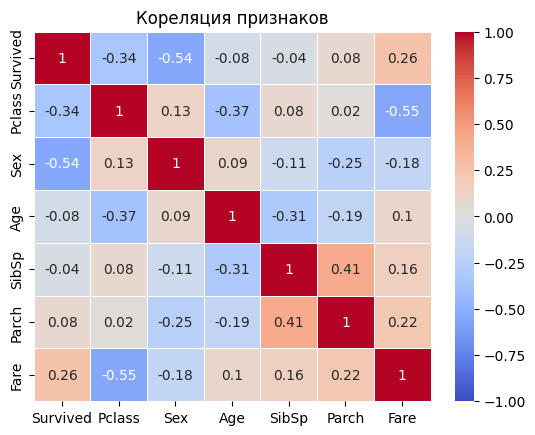

In [7]:
corrP = df_cor.corr(method='pearson', numeric_only=True).round(2)
sbn.heatmap(corrP, annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', linewidths=0.5).set_title('Кореляция признаков')
plt.show()